# Tennessee Contributions

## Project

The Accountability Project is an effort to cut across data silos and give journalists, policy professionals, activists, and the public at large a simple way to search across huge volumes of public data about people and organizations.

Our goal is to standardizing public data on a few key fields by thinking of each dataset row as a transaction. For each transaction there should be (at least) 3 variables:

1. All parties to a transaction.
2. The date of the transaction.
3. The amount of money involved.

## Objectives

This document describes the process used to complete the following objectives:

1. How many records are in the database?
2. Check for entirely duplicated records.
3. Check ranges of continuous variables.
4. Is there anything blank or missing?
5. Check for consistency issues.
6. Create a five-digit ZIP Code called zip.
7. Create a year field from the transaction date.
8. Make sure there is data on both parties to a transaction.

## Import

Data is obtained from the Tennessee Bureau of Ethics and Campaign Finance (BECF).

Data can be searched on the BECF [Online Campaign Finance Database](https://apps.tn.gov/tncamp-app/public/cesearch.htm) by year and downloaded locally.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read

In [2]:
tn = pd.read_csv('tn_contribs.csv')

### Explore

In [3]:
tn

,Type,Adj,Amount,Date,Election Year,Report Name,Recipient Name,Contributor Name,Contributor Address,Contributor Occupation,Contributor Employer,Description
0,Monetary,N,500.00,01/09/2000,2004.0,Early Supplemental,"NORRIS, MARK",TENNESSEE MANUFACTURED HOUSING ASSN PAC,"604 4TH AVENUE NORTH, NASHVILLE , TN, 37219",NaN,NaN,NaN
1,Monetary,N,250.00,01/09/2000,2004.0,Early Supplemental,"NORRIS, MARK","JONES, JASPER","8 VIKING DRIVE, CORDOVA , TN, 38018",NaN,NaN,NaN
2,Monetary,N,250.00,01/09/2000,2004.0,Early Supplemental,"NORRIS, MARK","WILLIAMS, BILL","659 THOMPSON LANE, NASHVILLE , TN, 37204",NaN,NaN,NaN
3,Monetary,N,500.00,01/09/2000,2004.0,Early Supplemental,"NORRIS, MARK",BB&S GOOD GOVT. COMMITTEE,"315 DEADERICK STREET SUITE 2700, NASHVILLE , T...",NaN,NaN,NaN
4,Monetary,N,250.00,01/09/2000,2004.0,Early Supplemental,"NORRIS, MARK",TENNESSEE OIL MARKETERS PAC,"P.O. BOX 101334, 430 ENOS REED DR., NASHVILLE ...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2010841,Monetary,N,250.00,06/09/2021,NaN,Annual Mid Year Supplemental,BUFFALO PAC,"LAVENDER, KEVIN","1064 BEECH TREE LANE, BRENTWOOD , TN, 37027",Corporate Officer,Fifth Third Bank,NaN
2010842,Monetary,N,250.00,06/09/2021,NaN,Annual Mid Year Supplemental,BUFFALO PAC,"CARTER, MICHAEL","1028 VAUGHN CREST DRIVE, FRANKLIN , TN, 37069",CORP OFFICER,PINNACLE CONSTRUCTION,NaN
2010843,Monetary,N,250.00,06/09/2021,NaN,Annual Mid Year Supplemental,BUFFALO PAC,"DAY, JOSEPH","188 IVY HILL LANE, GOODLETTSVILLE , TN, 37072",CONSULTANT,SELF EMPLOYED,NaN
2010844,Monetary,N,544.07,02/22/2021,2022.0,Early Mid Year Supplemental,"PARKINSON, ANTONIO '2 SHAY'",WALMART,"3950 AUSTIN PEAY, MEMPHIS , TN, 38128",NaN,NaN,NaN


### Missing

In [4]:
missingAmt = tn['Amount'].isnull()
missingAmt = missingAmt.to_frame()
tn = tn.join(missingAmt, rsuffix=' missing')

In [5]:
missingDate = tn['Date'].isnull()
missingDate = missingDate.to_frame()
tn = tn.join(missingDate, rsuffix=' missing')

In [6]:
missingRecipient = tn['Recipient Name'].isnull()
missingRecipient = missingRecipient.to_frame()
tn = tn.join(missingRecipient, rsuffix=' missing')

In [7]:
missingContributor = tn['Contributor Name'].isnull()
missingContributor = missingContributor.to_frame()
tn = tn.join(missingContributor, rsuffix=' missing')

In [8]:
dupes = tn.duplicated(subset=None, keep='first')
dupes = dupes.to_frame()
tn = tn.join(dupes)

In [9]:
tn = tn.rename(columns={0:'Duplicate?'})

In [10]:
tn

,Type,Adj,Amount,Date,Election Year,Report Name,Recipient Name,Contributor Name,Contributor Address,Contributor Occupation,Contributor Employer,Description,Amount missing,Date missing,Recipient Name missing,Contributor Name missing,Duplicate?
0,Monetary,N,500.00,01/09/2000,2004.0,Early Supplemental,"NORRIS, MARK",TENNESSEE MANUFACTURED HOUSING ASSN PAC,"604 4TH AVENUE NORTH, NASHVILLE , TN, 37219",NaN,NaN,NaN,False,False,False,False,False
1,Monetary,N,250.00,01/09/2000,2004.0,Early Supplemental,"NORRIS, MARK","JONES, JASPER","8 VIKING DRIVE, CORDOVA , TN, 38018",NaN,NaN,NaN,False,False,False,False,False
2,Monetary,N,250.00,01/09/2000,2004.0,Early Supplemental,"NORRIS, MARK","WILLIAMS, BILL","659 THOMPSON LANE, NASHVILLE , TN, 37204",NaN,NaN,NaN,False,False,False,False,False
3,Monetary,N,500.00,01/09/2000,2004.0,Early Supplemental,"NORRIS, MARK",BB&S GOOD GOVT. COMMITTEE,"315 DEADERICK STREET SUITE 2700, NASHVILLE , T...",NaN,NaN,NaN,False,False,False,False,False
4,Monetary,N,250.00,01/09/2000,2004.0,Early Supplemental,"NORRIS, MARK",TENNESSEE OIL MARKETERS PAC,"P.O. BOX 101334, 430 ENOS REED DR., NASHVILLE ...",NaN,NaN,NaN,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010841,Monetary,N,250.00,06/09/2021,NaN,Annual Mid Year Supplemental,BUFFALO PAC,"LAVENDER, KEVIN","1064 BEECH TREE LANE, BRENTWOOD , TN, 37027",Corporate Officer,Fifth Third Bank,NaN,False,False,False,False,False
2010842,Monetary,N,250.00,06/09/2021,NaN,Annual Mid Year Supplemental,BUFFALO PAC,"CARTER, MICHAEL","1028 VAUGHN CREST DRIVE, FRANKLIN , TN, 37069",CORP OFFICER,PINNACLE CONSTRUCTION,NaN,False,False,False,False,False
2010843,Monetary,N,250.00,06/09/2021,NaN,Annual Mid Year Supplemental,BUFFALO PAC,"DAY, JOSEPH","188 IVY HILL LANE, GOODLETTSVILLE , TN, 37072",CONSULTANT,SELF EMPLOYED,NaN,False,False,False,False,False
2010844,Monetary,N,544.07,02/22/2021,2022.0,Early Mid Year Supplemental,"PARKINSON, ANTONIO '2 SHAY'",WALMART,"3950 AUSTIN PEAY, MEMPHIS , TN, 38128",NaN,NaN,NaN,False,False,False,False,False


In [11]:
np.amax(tn.Amount)

3294101.89

In [12]:
np.min(tn.Amount)

0.0

In [13]:
zeroAmount = tn[tn.Amount==0.0] #318 instances, all but one are monetary
allzeros = len(zeroAmount)
monetaryzeros = len(zeroAmount[zeroAmount['Type'] == 'Monetary'])

(array([2.01081e+06, 1.00000e+01, 8.00000e+00, 1.40000e+01, 4.00000e+00]),
 array([      0.   ,  658820.378, 1317640.756, 1976461.134, 2635281.512,
        3294101.89 ]),
 <a list of 5 Patch objects>)

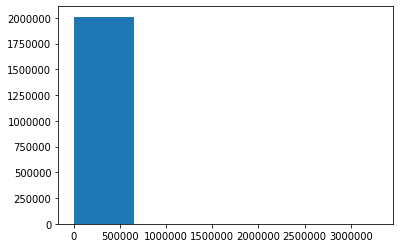

In [14]:
plt.hist(tn.Amount, bins=5)

In [15]:
tn['Year'] = tn['Date'].str[6:]

In [16]:
addresses = pd.read_csv('tn_addr.tsv', sep='\t')

In [17]:
addresses = addresses.rename(columns={'contributor_address': 'Contributor Address'})

In [18]:
addresses

,Contributor Address,addr_city,state,zip
0,"604 4TH AVENUE NORTH, NASHVILLE , TN, 37219","604 4TH AVENUE NORTH, NASHVILLE",TN,37219
1,"8 VIKING DRIVE, CORDOVA , TN, 38018","8 VIKING DRIVE, CORDOVA",TN,38018
2,"659 THOMPSON LANE, NASHVILLE , TN, 37204","659 THOMPSON LANE, NASHVILLE",TN,37204
3,"315 DEADERICK STREET SUITE 2700, NASHVILLE , T...","315 DEADERICK STREET SUITE 2700, NASHVILLE",TN,37238
4,"P.O. BOX 101334, 430 ENOS REED DR., NASHVILLE ...","P.O. BOX 101334, 430 ENOS REED DR., NASHVILLE",TN,37224
...,...,...,...,...
327526,"805 BLUE TEAL DR, GALLOWAY , NK, 08205","805 BLUE TEAL DR, GALLOWAY",NK,08205
327527,"737 BISHOP STREET STE. 3100, HONOLULU , HJ, 96813","737 BISHOP STREET STE. 3100, HONOLULU",HJ,96813
327528,"151 ST ANDREWS CT, MANKATO , ZZ, 56001","151 ST ANDREWS CT, MANKATO",ZZ,56001
327529,"10476 RALEIGH RD, WOODBURY , MM, 55129","10476 RALEIGH RD, WOODBURY",MM,55129


In [19]:
tn = addresses.merge(tn, on='Contributor Address', how='right')

In [20]:
#Make sure states are all abbreviated and are actually 50 states
stateAbbrev = ['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UM', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY']

In [30]:
validState = tn['state'].isin(stateAbbrev)
validState = validState.to_frame()
validState = validState.rename(columns={'state':'Valid State?'})
tn = tn.join(validState)

In [34]:
len(tn[tn['Valid State?'] == False]) #1705 impropoer state abbreviations

1705

In [35]:
tn[tn['Valid State?'] == False]

,Contributor Address,addr_city,state,zip,Type,Adj,Amount,Date,Election Year,Report Name,...,Contributor Occupation,Contributor Employer,Description,Amount missing,Date missing,Recipient Name missing,Contributor Name missing,Duplicate?,Year,Valid State?
991514,"PO BOX 1071 US ARMY KWAJALEIN ATOLL, APO , AP,...","PO BOX 1071 US ARMY KWAJALEIN ATOLL, APO",AP,96555,Monetary,N,500.00,02/16/2009,2010.0,Early Mid Year Supplemental,...,SUBSIDARY COMPANY PR,"BECHTEL NATIONAL, INC.",NaN,False,False,False,False,False,2009,False
991515,"PO BOX 1071 US ARMY KWAJALEIN ATOLL, APO , AP,...","PO BOX 1071 US ARMY KWAJALEIN ATOLL, APO",AP,96555,Monetary,N,500.00,08/12/2009,2010.0,Early Year End Supplemental,...,SUBSIDARY COMPANY PR,"BECHTEL NATIONAL, INC.",NaN,False,False,False,False,False,2009,False
991516,"PO BOX 1071 US ARMY KWAJALEIN ATOLL, APO , AP,...","PO BOX 1071 US ARMY KWAJALEIN ATOLL, APO",AP,96555,Monetary,N,500.00,06/07/2010,2010.0,2nd Quarter,...,SUBSIDARY COMPANY PR,"BECHTEL NATIONAL, INC.",NaN,False,False,False,False,False,2010,False
1043705,"14TH MP DETACHMENT, UNIT 15750, APO , AP, 96205","14TH MP DETACHMENT, UNIT 15750, APO",AP,96205,Monetary,N,100.00,03/31/2010,2010.0,1st Quarter,...,"COLONEL, PROVOST MARSHAL",UNITED STATES ARMY,NaN,False,False,False,False,False,2010,False
1443625,"469 OAK STREET, MANCHESTER , MH, 03104","469 OAK STREET, MANCHESTER",MH,03104,Monetary,N,25.00,07/23/2014,NaN,Pre-Primary,...,EXECUTIVE,NHDP,NaN,False,False,False,False,False,2014,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010846,"220 ADMIRAL BLVD , MISSISSAUGA, K4W 1K3",NaN,NaN,NaN,Monetary,N,64.38,07/31/2020,NaN,3rd Quarter,...,VICE PRESIDENT FUEL CELL AND HYDROGEN TECHNOL...,CUMMINS INC.,NaN,False,False,False,False,False,2020,False
2010847,"220 ADMIRAL BLVD , MISSISSAUGA, K4W 1K3",NaN,NaN,NaN,Monetary,N,64.38,08/14/2020,NaN,3rd Quarter,...,VICE PRESIDENT FUEL CELL AND HYDROGEN TECHNOL...,CUMMINS INC.,NaN,False,False,False,False,False,2020,False
2010848,"220 ADMIRAL BLVD , MISSISSAUGA, K4W 1K3",NaN,NaN,NaN,Monetary,N,64.38,08/31/2020,NaN,3rd Quarter,...,VICE PRESIDENT FUEL CELL AND HYDROGEN TECHNOL...,CUMMINS INC.,NaN,False,False,False,False,False,2020,False
2010849,"220 ADMIRAL BLVD , MISSISSAUGA, K4W 1K3",NaN,NaN,NaN,Monetary,N,64.38,09/15/2020,NaN,3rd Quarter,...,VICE PRESIDENT FUEL CELL AND HYDROGEN TECHNOL...,CUMMINS INC.,NaN,False,False,False,False,False,2020,False


In [38]:
tn[tn['zip'].str.len() > 5]

,Contributor Address,addr_city,state,zip,Type,Adj,Amount,Date,Election Year,Report Name,...,Contributor Occupation,Contributor Employer,Description,Amount missing,Date missing,Recipient Name missing,Contributor Name missing,Duplicate?,Year,Valid State?
6595,"211 ATHENS WAY, SUITE 100, NASHVILLE , TN, 372...","211 ATHENS WAY, SUITE 100, NASHVILLE",TN,37228-1603,Monetary,N,500.0,01/09/2000,2004.0,Early Supplemental,...,NaN,NaN,NaN,False,False,False,False,False,2000,True
6596,"211 ATHENS WAY, SUITE 100, NASHVILLE , TN, 372...","211 ATHENS WAY, SUITE 100, NASHVILLE",TN,37228-1603,Monetary,N,1000.0,11/08/2000,2004.0,Early Supplemental,...,NaN,NaN,NaN,False,False,False,False,False,2000,True
6597,"211 ATHENS WAY, SUITE 100, NASHVILLE , TN, 372...","211 ATHENS WAY, SUITE 100, NASHVILLE",TN,37228-1603,Monetary,N,1000.0,12/12/2000,2004.0,Early Supplemental,...,NaN,NaN,NaN,False,False,False,False,False,2000,True
6598,"211 ATHENS WAY, SUITE 100, NASHVILLE , TN, 372...","211 ATHENS WAY, SUITE 100, NASHVILLE",TN,37228-1603,Monetary,N,500.0,12/26/2000,2004.0,Early Supplemental,...,NaN,NaN,NaN,False,False,False,False,False,2000,True
6599,"211 ATHENS WAY, SUITE 100, NASHVILLE , TN, 372...","211 ATHENS WAY, SUITE 100, NASHVILLE",TN,37228-1603,Monetary,N,500.0,01/16/2001,2004.0,Early Supplemental,...,NaN,NaN,NaN,False,False,False,False,False,2001,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010717,"1299 WALNUT TERRACE, BOCA RATON , LF, 33486-5566","1299 WALNUT TERRACE, BOCA RATON",LF,33486-5566,Monetary,N,62.5,04/28/2017,NaN,Annual Mid Year Supplemental,...,DIR BUS DEV INTERNAL,"MEDNAX SERVICES, INC.",NaN,False,False,False,False,False,2017,False
2010718,"1299 WALNUT TERRACE, BOCA RATON , LF, 33486-5566","1299 WALNUT TERRACE, BOCA RATON",LF,33486-5566,Monetary,N,62.5,05/15/2017,NaN,Annual Mid Year Supplemental,...,DIR BUS DEV INTERNAL,"MEDNAX SERVICES, INC.",NaN,False,False,False,False,False,2017,False
2010719,"1299 WALNUT TERRACE, BOCA RATON , LF, 33486-5566","1299 WALNUT TERRACE, BOCA RATON",LF,33486-5566,Monetary,N,62.5,05/31/2017,NaN,Annual Mid Year Supplemental,...,DIR BUS DEV INTERNAL,"MEDNAX SERVICES, INC.",NaN,False,False,False,False,False,2017,False
2010720,"1299 WALNUT TERRACE, BOCA RATON , LF, 33486-5566","1299 WALNUT TERRACE, BOCA RATON",LF,33486-5566,Monetary,N,62.5,06/15/2017,NaN,Annual Mid Year Supplemental,...,DIR BUS DEV INTERNAL,"MEDNAX SERVICES, INC.",NaN,False,False,False,False,False,2017,False


In [55]:
#Trim zips that have additional 4 digit code
zips = tn['zip'].str.split('-', expand=True)
zips = zips.drop([1], axis=1)
zips = zips.rename(columns={0:'Standardized Zip'})
tn = tn.join(zips)

In [56]:
tn

,Contributor Address,addr_city,state,zip,Type,Adj,Amount,Date,Election Year,Report Name,...,Contributor Employer,Description,Amount missing,Date missing,Recipient Name missing,Contributor Name missing,Duplicate?,Year,Valid State?,Standardized Zip
0,"604 4TH AVENUE NORTH, NASHVILLE , TN, 37219","604 4TH AVENUE NORTH, NASHVILLE",TN,37219,Monetary,N,500.00,01/09/2000,2004.0,Early Supplemental,...,NaN,NaN,False,False,False,False,False,2000,True,37219
1,"604 4TH AVENUE NORTH, NASHVILLE , TN, 37219","604 4TH AVENUE NORTH, NASHVILLE",TN,37219,Monetary,N,250.00,12/17/2001,2004.0,Early Supplemental,...,NaN,NaN,False,False,False,False,False,2001,True,37219
2,"604 4TH AVENUE NORTH, NASHVILLE , TN, 37219","604 4TH AVENUE NORTH, NASHVILLE",TN,37219,Monetary,N,500.00,12/17/2001,2004.0,Early Supplemental,...,NaN,NaN,False,False,False,False,False,2001,True,37219
3,"604 4TH AVENUE NORTH, NASHVILLE , TN, 37219","604 4TH AVENUE NORTH, NASHVILLE",TN,37219,Monetary,N,1000.00,11/30/2001,2004.0,Early Supplemental,...,NaN,NaN,False,False,False,False,False,2001,True,37219
4,"604 4TH AVENUE NORTH, NASHVILLE , TN, 37219","604 4TH AVENUE NORTH, NASHVILLE",TN,37219,Monetary,N,500.00,01/19/2003,2004.0,Early Supplemental,...,NaN,NaN,False,False,False,False,False,2003,True,37219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010846,"220 ADMIRAL BLVD , MISSISSAUGA, K4W 1K3",NaN,NaN,NaN,Monetary,N,64.38,07/31/2020,NaN,3rd Quarter,...,CUMMINS INC.,NaN,False,False,False,False,False,2020,False,NaN
2010847,"220 ADMIRAL BLVD , MISSISSAUGA, K4W 1K3",NaN,NaN,NaN,Monetary,N,64.38,08/14/2020,NaN,3rd Quarter,...,CUMMINS INC.,NaN,False,False,False,False,False,2020,False,NaN
2010848,"220 ADMIRAL BLVD , MISSISSAUGA, K4W 1K3",NaN,NaN,NaN,Monetary,N,64.38,08/31/2020,NaN,3rd Quarter,...,CUMMINS INC.,NaN,False,False,False,False,False,2020,False,NaN
2010849,"220 ADMIRAL BLVD , MISSISSAUGA, K4W 1K3",NaN,NaN,NaN,Monetary,N,64.38,09/15/2020,NaN,3rd Quarter,...,CUMMINS INC.,NaN,False,False,False,False,False,2020,False,NaN
